### 1. 이진분류
* 직선으로 표현하기 어려운 이진분류 문제
* 예시 : 합격/불합격 판정 모델
* 주로 S 자 형태로 표현할 수 있는 함수가 필요한데... 이것이 시그모이드 함수,,
* 예측 값은 0에서 1사이 값이 나오지만, 0.5를 기준으로 0/1 가부 판정

$$H(x) = \frac{1}{1 + e^{-(wx + b)}} = sigmoid(wx + b) = σ(wx + b)$$

* 여기서 구해야 할 것은 주어진 데이터에 가장 적합한 w, b를 구하는 것임
* 즉, 알고리즘이 하는 것은 주어진 데이터에 적합한 가중치 w와 상수항 b를 구하는 것임

In [1]:
### 시그모이드 시각화 : w=1, b=0 일 때 가정
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [2]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

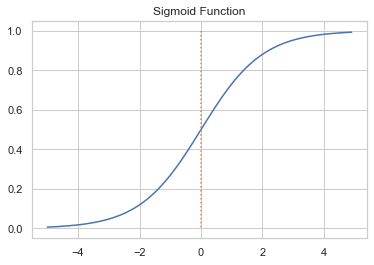

In [17]:
%matplotlib inline
plt.plot(x, y)
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

* x가 증가할 수록 1에 수렴하고 모든 값이 0에서1사이의 값 출력

In [19]:
### 가중치 w와 편향 b가 출력값에 어떤 영향을 미치는지 시각화
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

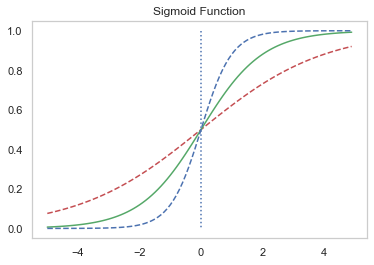

In [21]:
plt.plot(x, y1, 'r', linestyle="--")
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ":") # 가운데 접선 추가
plt.title("Sigmoid Function")
plt.grid(False)
plt.show()

* w 값이 커질 수록 빠르게 0과 1에 수렴

In [22]:
## 절편 값에 따라 변화 확인

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x + 1)
y3 = sigmoid(x + 1.5)

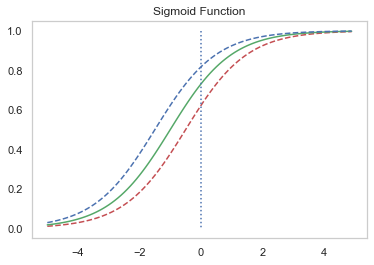

In [23]:
plt.plot(x, y1, 'r', linestyle="--")
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ":") # 가운데 접선 추가
plt.title("Sigmoid Function")
plt.grid(False)
plt.show()

### 3. 비용함수(Cost Function)
* 로지스틱 회귀는 SGD(경사하강법)을 사용하여 가중치를 찾아내지만 비용함수로 평균제곱오차를 사용하지 않음
* 왜냐하면 로컬 미니멈(Local Minimum) 문제에 빠질 가능성이 높기 때문임
* 따라서 로지스틱 회귀 문제에서 가중치 $w$를 최소로 만드는 적절한 새로운 비용함수를 찾아야 됨

---

* 시그모이드 함수는 0과 1사이의 값을 반환하므로 실제값이 0일때 예측 $y$ 값이 1에 가까워지면 오차가 커짐을 의미하고 반대도 마찬가지임

$$\text{if } y=1 → \text{cost}\left( H(x), y \right) = -\log(H(x))$$
$$\text{if } y=0 → \text{cost}\left( H(x), y \right) = -\log(1-H(x))$$

---
$$\text{cost}\left( H(x), y \right) = -[ylogH(x) + (1-y)log(1-H(x))]$$

* 로지스틱 회귀의 목적함수는 아래와 같음

$$J(w) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}logH(x^{(i)}) + (1-y^{(i)})log(1-H(x^{(i)}))]$$

* 목적함수와 비용함수의 차이
    * 목적함수는 최소화 또는 최대화 하고자 하는 함수
    * 비용함수는 최소화시킨 함수
    * 결과적으로는 동일한 함수가 됨

### 4. Keras로 구현하는 로지스틱 회귀

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [41]:
x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

In [42]:
model = Sequential()  
model.add(Dense(1, input_dim=1, activation='sigmoid'))  # 데이터 차원과 목적함수 지정

# 최적화 준비
sgd = optimizers.SGD(lr=0.01)  
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

# training
model.fit(x, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 526ms/step - loss: 32.1259 - binary_accuracy: 0.1538
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 26.6218 - binary_accuracy: 0.1538
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 21.1191 - binary_accuracy: 0.1538
Epoch 4/200
1/1 [==============================] - 0s 4ms/step - loss: 15.6205 - binary_accuracy: 0.1538
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 10.1362 - binary_accuracy: 0.1538
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 4.7096 - binary_accuracy: 0.1538
Epoch 7/200
1/1 [==============================] - 0s 5ms/step - loss: 0.4114 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 4ms/step - loss: 0.2590 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2414 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 4m

1/1 [==============================] - 0s 5ms/step - loss: 0.1906 - binary_accuracy: 0.9231
Epoch 80/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1905 - binary_accuracy: 0.9231
Epoch 81/200
1/1 [==============================] - 0s 5ms/step - loss: 0.1904 - binary_accuracy: 0.9231
Epoch 82/200
1/1 [==============================] - 0s 5ms/step - loss: 0.1903 - binary_accuracy: 0.9231
Epoch 83/200
1/1 [==============================] - 0s 5ms/step - loss: 0.1901 - binary_accuracy: 0.9231
Epoch 84/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1900 - binary_accuracy: 0.9231
Epoch 85/200
1/1 [==============================] - 0s 3ms/step - loss: 0.1899 - binary_accuracy: 0.9231
Epoch 86/200
1/1 [==============================] - 0s 5ms/step - loss: 0.1898 - binary_accuracy: 0.9231
Epoch 87/200
1/1 [==============================] - 0s 3ms/step - loss: 0.1896 - binary_accuracy: 0.9231
Epoch 88/200
1/1 [==============================] - 0s 3ms/step - lo

1/1 [==============================] - 0s 3ms/step - loss: 0.1817 - binary_accuracy: 0.9231
Epoch 157/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1816 - binary_accuracy: 0.9231
Epoch 158/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1815 - binary_accuracy: 0.9231
Epoch 159/200
1/1 [==============================] - 0s 5ms/step - loss: 0.1814 - binary_accuracy: 0.9231
Epoch 160/200
1/1 [==============================] - 0s 3ms/step - loss: 0.1813 - binary_accuracy: 0.9231
Epoch 161/200
1/1 [==============================] - 0s 3ms/step - loss: 0.1812 - binary_accuracy: 0.9231
Epoch 162/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1810 - binary_accuracy: 0.9231
Epoch 163/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1809 - binary_accuracy: 0.9231
Epoch 164/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1808 - binary_accuracy: 0.9231
Epoch 165/200
1/1 [==============================] - 0s 4ms/

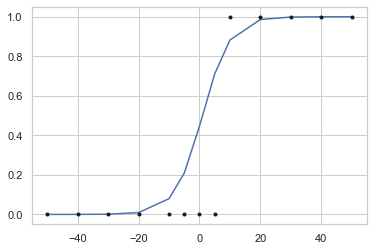

In [43]:
# 실제 값과 예측값 차이를 시각화 
plt.plot(x, model.predict(x), 'b', x, y, 'k.')
plt.show()

* x 값이 5부터 10사이에서 y 값이 0.5를 넘어서기 시작

In [44]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.50159574]
 [0.5570811 ]
 [0.6111777 ]
 [0.662668  ]
 [0.68711734]]
[[0.9034181 ]
 [0.98862845]
 [0.99876404]
 [0.99986684]
 [1.        ]]


In [39]:
print(model.predict([0]))

[[0.44552293]]
